# The easiest way to adjust your data for inflation in Python

## Setup

In [1]:
import pandas as pd
from datetime import date
import cpi
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.rcParams["figure.dpi"] = 300

In [2]:
%config InlineBackend.figure_format = 'retina'

In [2]:
cpi.update()

## Basic operations with `cpi`

In [3]:
cpi.inflate(100, 2000)

150.2967479674797

In [4]:
cpi.inflate(100, 2000, to=2010)

126.62950058072012

In [5]:
cpi.inflate(100, date(2000, 1, 1), to=date(2010, 1, 1))

128.3690758293839

In [6]:
cpi.get(2020)

258.811

## Combining `cpi` with `pandas`

In [20]:
df = pd.read_csv("../data/MEHOINUSA646N.csv", parse_dates=True, index_col="DATE")
df = df.rename(columns={"MEHOINUSA646N": "current_dollars"})
df["year"] = df.index.year
df.head()

,current_dollars,year
DATE,,
1984-01-01,22415,1984
1985-01-01,23618,1985
1986-01-01,24897,1986
1987-01-01,26061,1987
1988-01-01,27225,1988


In [21]:
df["real_dollars"] = df.apply(lambda x: cpi.inflate(x["current_dollars"], x["year"]), axis=1)

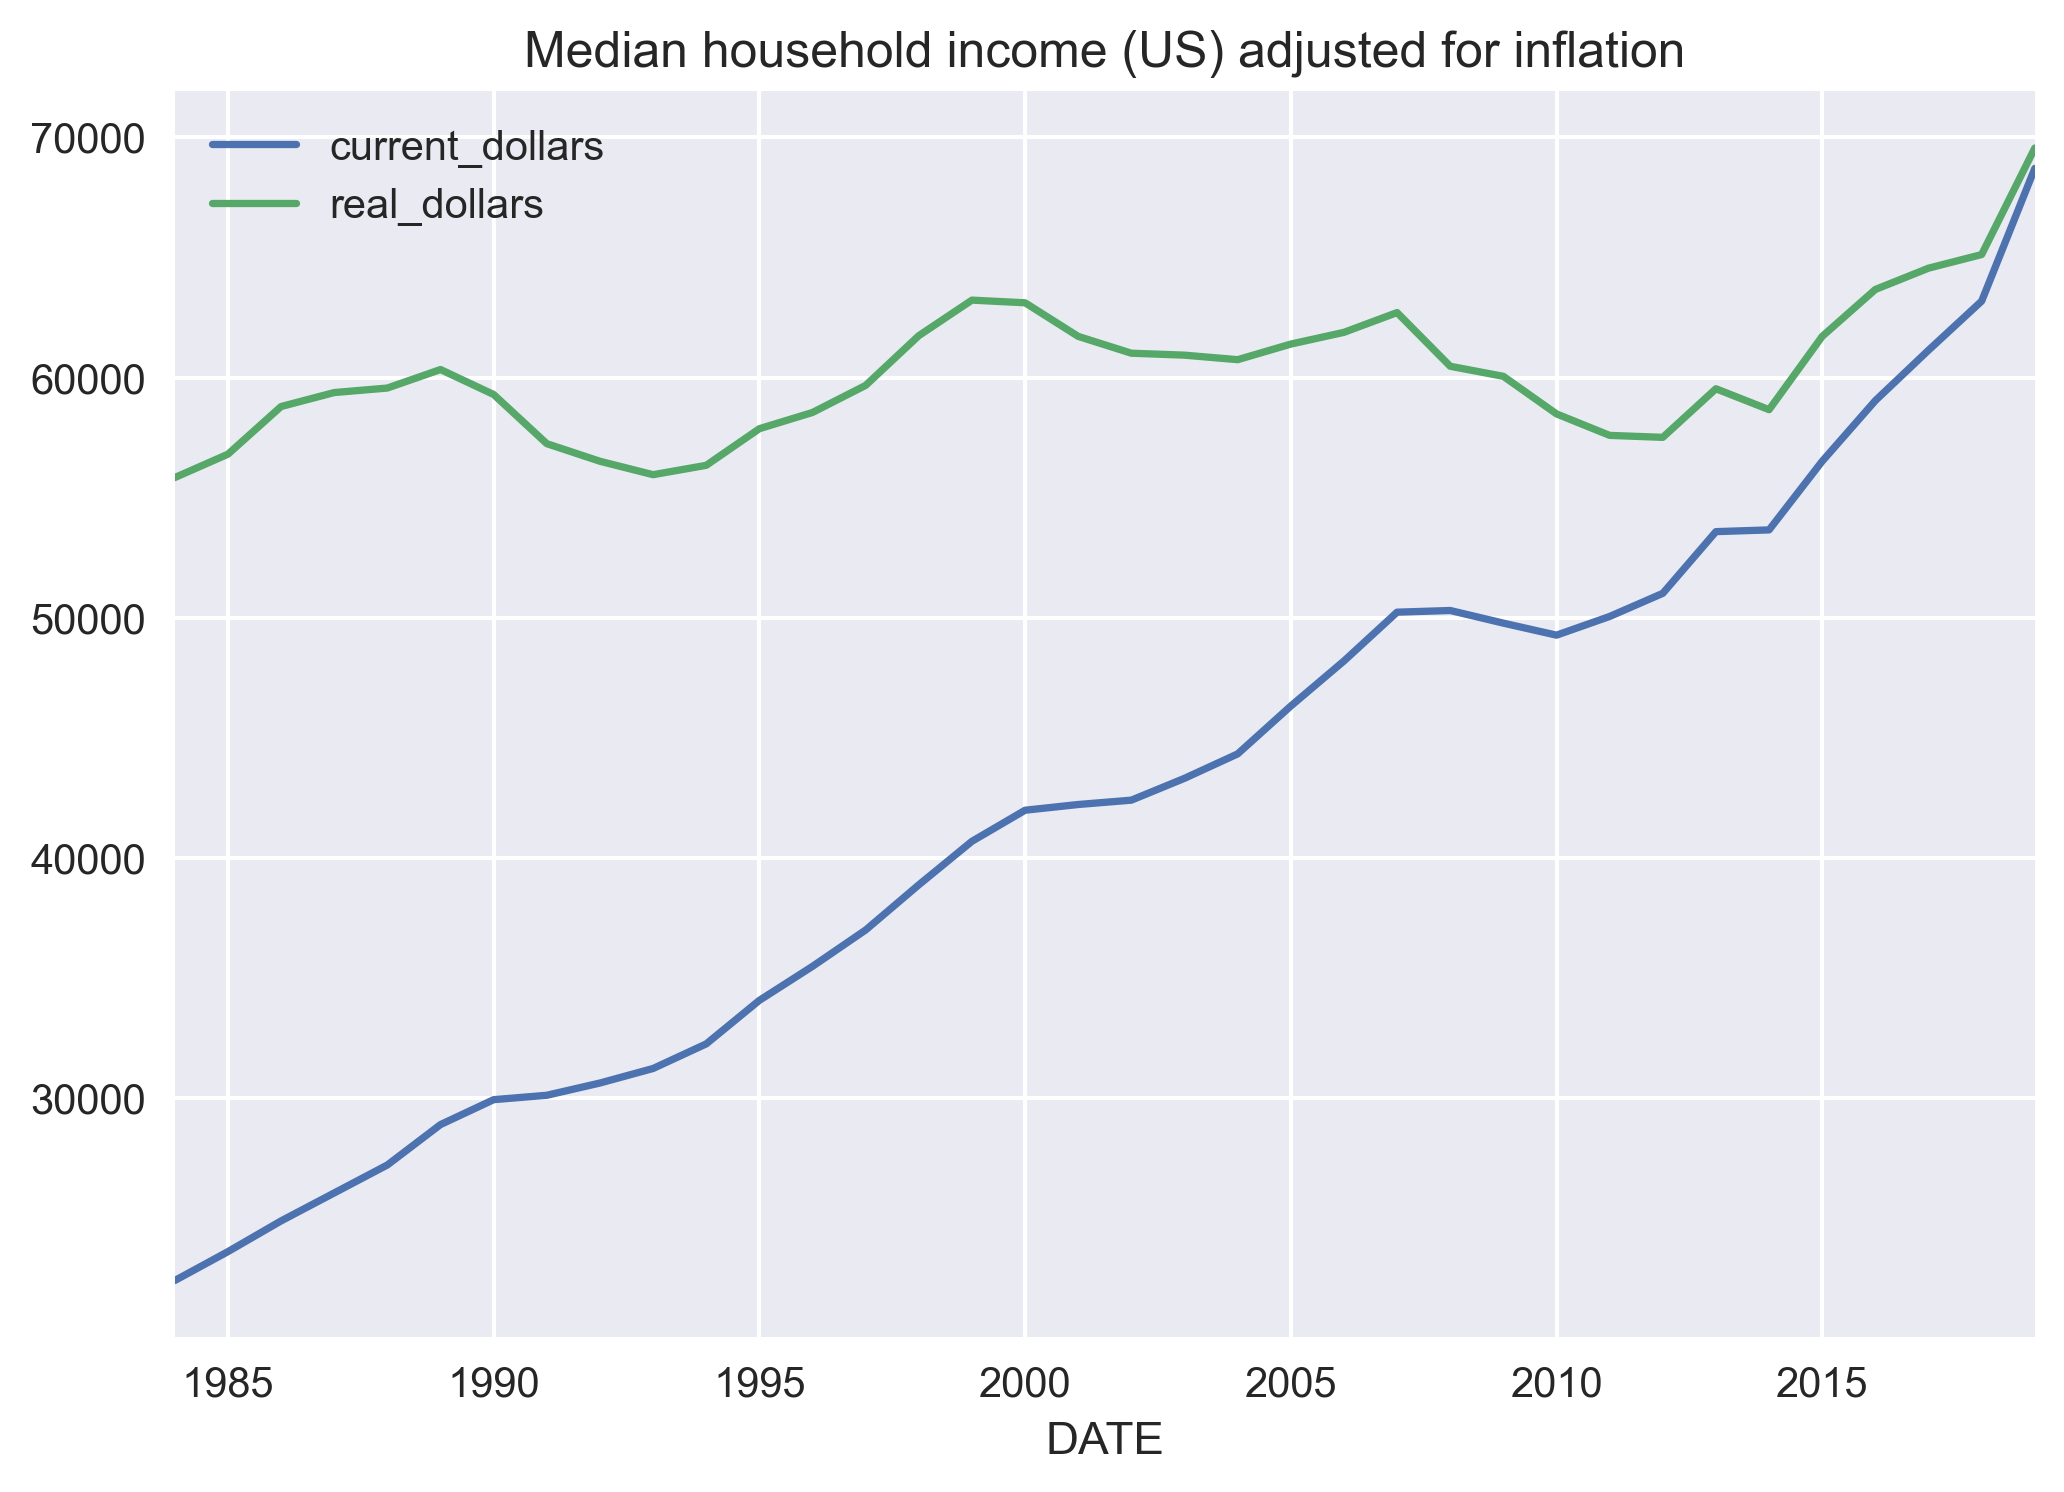

In [22]:
df[["current_dollars", "real_dollars"]].plot(title="Median household income (US) adjusted for inflation");